In [59]:
import torch
from tqdm import tqdm
torch.__version__

'2.0.1+cu118'

### Creating a sample dataset for linear regresion

In [29]:
# here we will try to make data as linear as possible
weight = 0.5 # slope
bias = 0.33 # intercept

# Let's create 150 datapoints
start, end, step = 0, 150, 1 # start, end, and stepsize of data is assigned

# generate X values based on start and end of data and step size
X = torch.arange(start, end, 1, dtype=torch.float32).unsqueeze(dim=1)

# now create y valuees based on known parameters
y = weight * X + bias

In [30]:
len(X)

150

### Let's visualize our data

In [31]:
#Here we are importing libraries for visualization
import matplotlib.pyplot as plt

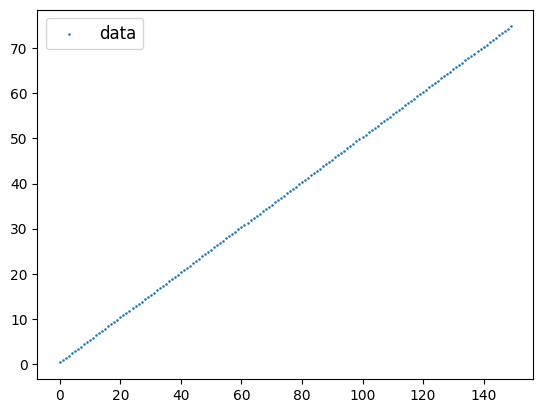

In [32]:
# lets visualize our data
plt.figure()
plt.scatter(X,y, s=0.7, label="data") # here s controls the size of marker
plt.legend(fontsize=12)
plt.show()

### Create Training and Testing Data


In [33]:
# for creating training and testing data we are going to use train_test_splie module from sklearn
# Let's import our requirements
from sklearn.model_selection import train_test_split

# we are going to create a split of 80% samples as training and 20% samples as testing
# random state controls random shuffling of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [34]:
print(f" length of X_train: {len(X_train)} samples and y_train {len(y_train)} samples", end="\n")
print(f" length of X_test: {len(X_test)} samples and y_test {len(y_test)} samples", end="\n")

 length of X_train: 120 samples and y_train 120 samples
 length of X_test: 30 samples and y_test 30 samples


In [35]:
# let's visualize our trainig and testing split
# here we are writing a function to visualize our data so it can be used later

def visualize(X, y, color: str, label: str) :
  plt.figure()
  plt.scatter(X, y, s=10, c = color, label = label)
  plt.legend()
  plt.show()

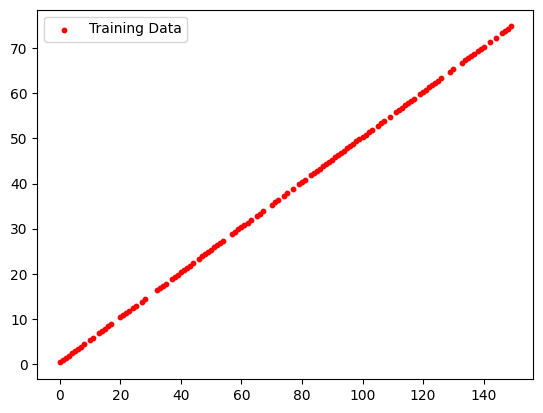

In [36]:
visualize(X_train, y_train, 'r', 'Training Data')

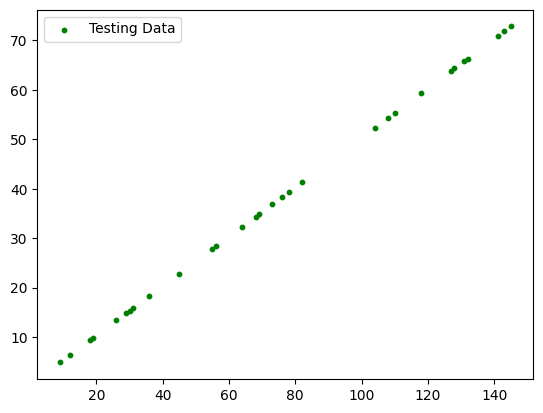

In [37]:
visualize(X_test, y_test, 'g', 'Testing Data')

### now let's create a linear model

In [228]:
# to create a pytorch model we need to import nn
import torch.nn as nn

# let's create a class to define linear model in pytorch

class LinearRegression(nn.Module):
  def __init__(self):
     super().__init__()
     self.linear_layer = nn.Linear(in_features = 1, out_features = 1)
  
  def forward(self, X):
    y = self.linear_layer(X)
    return y

In [229]:
# let's create an instance of the model we have created
Lr = LinearRegression()

# print(list(Lr.parameters()), end="\n")

# state_dict() gives us randomly initiated weights and biases
Lr.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

### Training and Testing


In [230]:
# mean absolute error loss
loss_function = nn.L1Loss() 
optimizer = torch.optim.SGD(params = Lr.parameters(), lr = 0.05)

In [210]:
y_pred = Lr(X_train)
loss = loss_function(y_pred, y_train)
print(loss)

tensor(536.3853, grad_fn=<MseLossBackward0>)


In [ ]:
#from scipy.sparse.linalg._eigen import test
lr = 0.05
epochs = 500

training_loss = []
test_loss = []

torch.manual_seed(42)

#tqdm is used for showing a progress bar
for epoch in tqdm(range(epochs)):
  # setting our model in training mode
  Lr.train()

  # 1. forward pass
  y_pred = Lr(X_train)

  # 2. calculate loss
  loss = loss_function(y_pred, y_train)
  training_loss.append(loss.detach())

  #3. optimizer.zero_grad()
  optimizer.zero_grad()

  #4. back propagation
  loss.backward()

  #5. Update the parameters
  optimizer.step()
  
  # setting our model into eval mode
  Lr.eval()
  # testing loop
  with torch.inference_mode():
    """
    we are not updating parametrs in this loop;
    it is just a foraward pass.
    """
    #1. forward pass
    y_test_pred = Lr(X_test)

    # 2. calculate loss
    testing_loss = loss_function(y_test_pred, y_test)

    test_loss.append(testing_loss.detach())

    print(f"epoch {epoch} : train loss {loss.detach(): .2f} , test loss {testing_loss.detach():.2f}")
print("Trained")

### Let's Print the Results

In [226]:
# Here we will update our function
def visualize(X, y, color: str, label: str, model) :
  model.eval()
  with torch.inference_mode():
    y_predictions = model(X)
  plt.figure()
  plt.scatter(X, y, s=10, c = color, label = label)
  plt.scatter(X_test,y_predictions.detach().numpy(), s=10)
  plt.legend()
  plt.show()

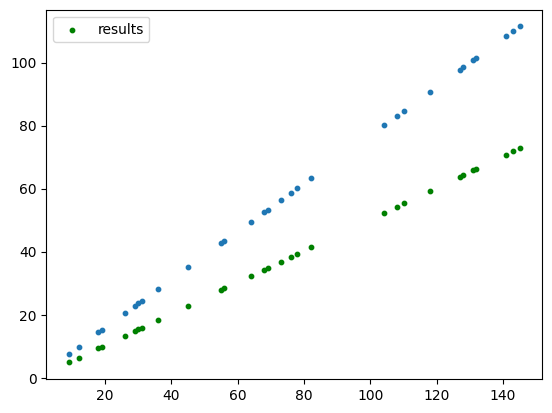

In [235]:
visualize(X_test, y_test, 'g', 'results', Lr)